# Bike Rental Machine Learning Assignment with Linear Regression

In [13]:
## Step 1: Reading and understanding the data

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [15]:
# 1.Importing Required Libraries 
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# 3.Preliminary Analysis on the dataset. Shape, Describe and info commands were used.
df.shape

(730, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [18]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [19]:
# find the missing value counts in each column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
# find the missing value precentage in each column
round(100 * (df.isnull().sum() / len(df.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [21]:
# Convertion of variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated
df['weathersit'] = df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Step 2: Data Visualization i.e. Visualising the data

<AxesSubplot:xlabel='weathersit', ylabel='registered'>

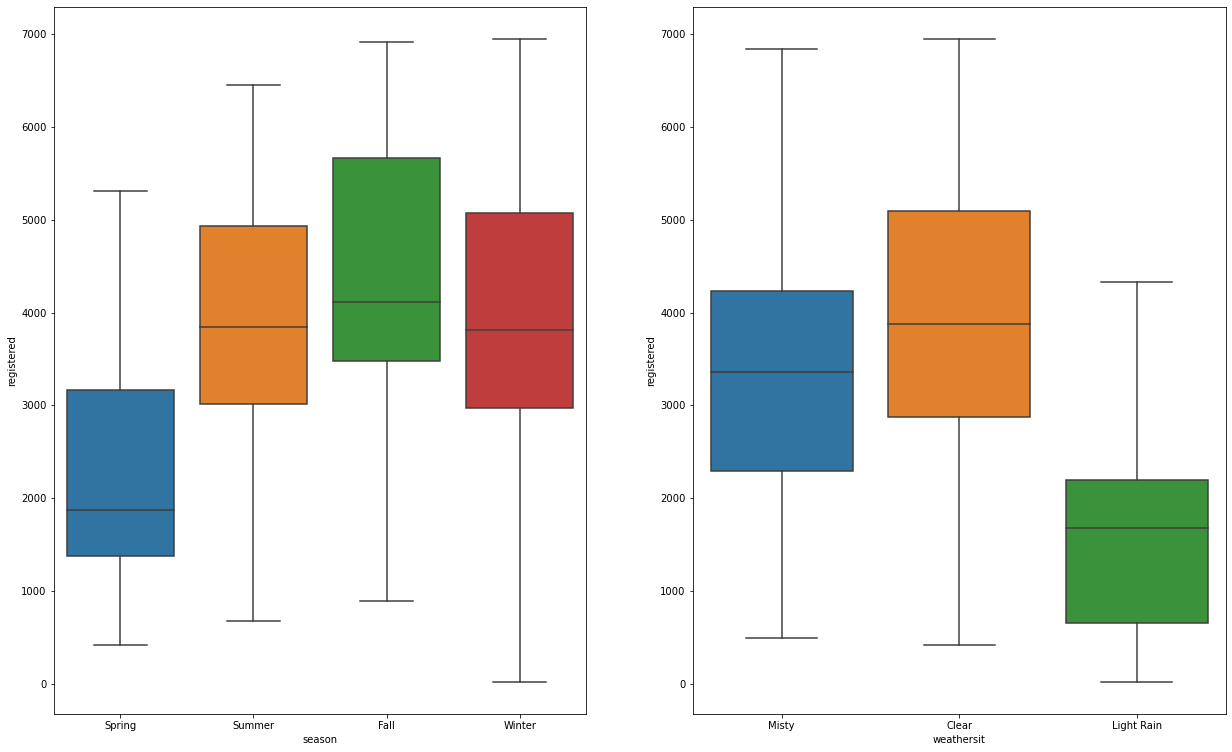

In [22]:
# 1.Visualising Categorical columns to see the coorelation of predictor variable with the target variable
plt.figure(figsize=(21,13))
plt.subplot(1,2,1)   #total 1 rows,2 columns,1 index in current plot
sns.boxplot(x = 'season',y='registered',data =df)
plt.subplot(1,2,2)   #total 1 rows,2 columns,2 index in current plot
sns.boxplot(x = 'weathersit',y='registered',data =df)

In [ ]:
# 2.Visualising Numerical Variables
sns.pairplot(df)
plt.show()

In [ ]:
df.head()

###Step 3: Data Preparation

 ##1.Creating Dummy variables with k-1 columns where k = number of individual unique value. 
 Then, concatenating it to the original Dataframe and dropping the original Column as it is no longer need and is redundant.


In [ ]:
df = df.drop(columns = ["dteday","instant","registered"])
df.head()

In [ ]:
status = pd.get_dummies(df['season'])
status.head()

In [ ]:
status1 = pd.get_dummies(df['weathersit'])
status1.head()

In [ ]:
df = pd.concat([df, status,status1], axis = 1)
df.head()

In [ ]:
df.drop(['season','weathersit'], axis = 1, inplace = True)
df.head()

In [ ]:
# Shape of New DataFrame
df.shape

###Step 4 : Building the Model

In [ ]:
# Shape of New DataFrame
# 1.Splitting the data into Training and test data with 70:30 Ratio using train_test_split method.
df_train,df_test = train_test_split(df,train_size=0.70,test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

In [ ]:
# 2.Scaling Train data using MinMaxScaler(MinMaxScaler scales data between 0 and 1)
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','casual','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

In [ ]:
df_train.head()

In [ ]:
##3.Visualising Correlation between different Variables
plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
df_train.describe()

In [ ]:
# 3.Build the model

#Initilize the Linear Regression Model
#Creating y_train(Target variable) and X_train(all other independent variables)
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
#running rfe
# 4. Use RFE(Recursive Feature Elimination) to limit the variables.

#Initilzing RFE and giving number of features to select.
#Fit the data to RFE
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select = 14)     
rfe = rfe.fit(X_train,y_train)

In [ ]:
#Lets see which features were selected and which features were not selected and thier rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#Columns that were selcted by RFE
#Columns that were not selected by RFE
# 5.Taking only RFE selected features and adding Constant to it.
# Note : Statsmodel by default draws the line from the center(0,0), we need to give a Constant(intercept) value for it to consider.
#model 1
num_vars = X_train.columns[rfe.support_]
X_train_lm = X_train[num_vars]
X_train_lm_sm = sm.add_constant(X_train_lm)
X_train_lm_sm

In [ ]:

# 6.Initilize a OLS(Ordinary Least Squares regression) using updated X_train and y_train and fit the model.
# Once fitted, we can use an inbuilt method called summary() to check p value, R^2 value and other important values.

#Build 1X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# holiday p value was greater than 5, so dropping.
# model 2
X_train_lm = X_train_lm.drop('holiday',axis=1)

In [ ]:
# Rebuilding Model
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# Clear p value was greater than 5, so dropping.
# model 3
X_train_lm = X_train_lm.drop('Clear',axis=1)

In [ ]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# atemp p value was greater than 5, so dropping.
#model4
X_train_lm = X_train_lm.drop('atemp',axis=1)

In [ ]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# atemp vif value was greater than 5, so dropping.
#model5
X_train_lm = X_train_lm.drop('hum',axis=1)

In [ ]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# temp vif value was greater than 5, so dropping.
#model5
X_train_lm = X_train_lm.drop('temp',axis=1)

In [ ]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
# casual coef value was greater than 5, so dropping.
#model5
X_train_lm = X_train_lm.drop('casual',axis=1)

In [ ]:
X_train_lm_sm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm_sm)
lm_model = lm.fit()
lm_model.summary()

In [ ]:
vif = pd.DataFrame()
vif['feature'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending= False)
vif

In [ ]:
###Step 6: Residual Analysis on the training data and model validation.

In [ ]:
##.# 1.Predicting the Y_train value(Count) using the model
y_train_pred = lm_model.predict(X_train_lm_sm)
y_train_pred

In [ ]:
# 2.Calculating Residual value
# 3.Visualising the residual value to check if the model not failing any conditions

res = y_train - y_train_pred
sns.distplot(res, bins=20)

In [ ]:
res.head()

###Step 7: Making Predictions Using the Final Model

In [ ]:
# 4.Scaling the test Dataset
var_list = ['temp','atemp','hum','windspeed','casual','cnt']
df_test[var_list] = scaler.transform(df_test[var_list])

In [ ]:
# 5.Extracting y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

In [ ]:
# 6. Dropping all the Columns that we have dropped in the training of the model
X_test = X_test.drop(columns=["temp","atemp","hum","casual","mnth","holiday","Fall","Clear","Summer"])

In [ ]:
# 7. Adding the constant to X_test and making Predictions to find y_pred value.
X_test_sm =sm.add_constant(X_test)

In [ ]:
y_pred = lm_model.predict(X_test_sm)


###Step 8: Model Evaluation

In [ ]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test,y_pred)
print(r_squared_train*100)
print(r_squared_test*100)

In [ ]:
# Plotting Y_test vs Y_pred Scatter plot
plt.figure()
sns.regplot(x=y_test, y=y_pred,fit_reg=True, line_kws={"color":"yellow"})
plt.show()

In [ ]:
### Best FIT line for model parameters 0.5297 + .2489 * year + 0.0093 * weekday + 0.0261 * workingday + (-0.2001) * windspeed + (-0.2848) * Spring + (-0.0573) * Winter + (-0.2909) * Light Rain +(-0.0922)*Misty     
round(lm_model.params,4)

***The Best Fit Line is (0.5297 + .2489 * year + 0.0093 * weekday + 0.0261 * workingday + (-0.2001) * windspeed + (-0.2848) * Spring + (-0.0573) * Winter + (-0.2909) * Light Rain +(-0.0922)*Misty )    

In [ ]:
# Calculating Adjusted-R^2 value for Train and Test a dataset
adjusted_r2_train = round(1-(1-r_squared_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_test = round(1-(1-r_squared_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_train)
print(adjusted_r2_test)

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.7532
- Test dataset R^2           : 0.7361
- Train dataset Adjusted R^2 : 0.7447    
- Test dataset Adjusted R^2  : 0.7261